In [19]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# creating path
path = r'C:\Users\nikik\achievement 6\boat_data_cleaned.csv'

In [4]:
df = pd.read_csv(path)

In [6]:
df.head()

,Price,Boat Type,Manufacturer,Type,Year,Length,Width,Material,Location,Number of views,price_clean
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,3337.0
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3490.0
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,3770.0
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,Denmark Â» Svendborg,64,25900.0
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3399.0


In [5]:
df.columns

Index(['Price', 'Boat Type', 'Manufacturer', 'Type', 'Year', 'Length', 'Width',
       'Material', 'Location', 'Number of views', 'price_clean'],
      dtype='object')

# Clean your data


In [7]:
# selecting variables for regression
df_reg = df[["Length", "price_clean"]]

In [11]:
# checking missing values
df_reg.isnull().sum()

Length         0
price_clean    0
dtype: int64

In [12]:
# checking for duplicates
df_reg.duplicated().sum()

621

In [13]:
# removing duplicates
df_reg = df_reg.drop_duplicates()

In [14]:
# checking output
df_reg.duplicated().sum()

0

In [15]:
df_reg.shape

(8969, 2)

In [16]:
df_reg.dtypes

Length         float64
price_clean    float64
dtype: object

In [17]:
df_reg.describe()


,Length,price_clean
count,8969.000000,8.969000e+03
mean,11.517461,3.150640e+05
std,6.069900,1.007051e+06
min,1.040000,3.300000e+03
25%,7.400000,4.297000e+04
50%,10.200000,9.500000e+04
75%,13.880000,2.500000e+05
max,100.000000,3.100000e+07


# Exploring data visually

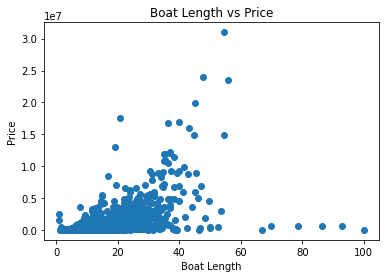

In [20]:
plt.figure()
plt.scatter(df_reg['Length'], df_reg['price_clean'])
plt.xlabel('Boat Length')
plt.ylabel('Price')
plt.title('Boat Length vs Price')
plt.show()


# Hypothesis

**H₀ (Null Hypothesis):**  
There is no significant relationship between boat length and price.

**H₁ (Alternative Hypothesis):**  
Boat length has a significant positive relationship with price, meaning that longer boats tend to be more expensive.

In [25]:
# reshaping variables
X = df_reg['Length'].values.reshape(-1, 1)
y = df_reg['price_clean'].values.reshape(-1, 1)

In [26]:
print(X.shape)
print(y.shape)

(8969, 1)
(8969, 1)


In [27]:
# spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(6278, 1) (2691, 1)
(6278, 1) (2691, 1)


In [34]:
reg = LinearRegression()

In [35]:
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = reg.predict(X_test)

In [37]:
type(reg)

sklearn.linear_model._base.LinearRegression

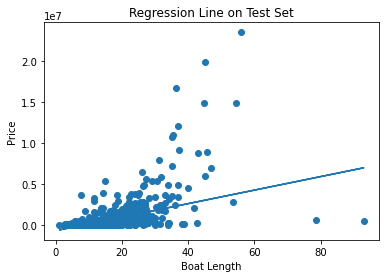

In [38]:
plt.figure()
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel('Boat Length')
plt.ylabel('Price')
plt.title('Regression Line on Test Set')
plt.show()

# Interpretation
The regression line shows a positive relationship between boat length and price, indicating that longer boats generally tend to be more expensive. However, the data points are widely scattered around the regression line, especially at shorter boat lengths. This suggests that while length influences price, it does not fully explain the variation in boat prices. Other factors, such as manufacturer, boat type, year, and condition, likely play an important role in determining price.

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [40]:
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 807308337634.4303
R² Score: 0.32650250023570926


In [41]:
comparison_df = pd.DataFrame({'Actual Price': y_test.flatten(),'Predicted Price': y_pred.flatten()})

In [42]:
comparison_df.head()

,Actual Price,Predicted Price
0,260809.0,115635.648490
1,58190.0,-76884.729262
2,225000.0,190504.684282
3,249000.0,970459.035174
4,29000.0,11970.829700


# Include your thoughts on how well the model performed on the test set in a markdown cell.
# Include any reflections you have on the impact of possible data bias.
The linear regression model shows a moderate ability to predict boat prices on the test set. With an R² score of approximately 0.33, the model explains around one-third of the variation in boat prices using boat length as the sole predictor. While the regression line captures the overall positive trend between length and price, the large Mean Squared Error indicates substantial differences between predicted and actual values. This suggests that boat length alone is insufficient to accurately predict prices and that additional variables would be needed to improve model performance.

Several sources of potential data bias may also influence the results. The dataset contains a wide range of boat prices, including extreme high-value listings, which can disproportionately affect the regression line and error metrics. Additionally, the data may be geographically biased toward certain countries or markets, where pricing structures differ due to economic factors, taxes, or consumer demand. Missing or incomplete information for some listings, as well as variations in boat condition and features not captured in the dataset, may further limit the model’s predictive accuracy. These biases highlight the importance of careful data interpretation and the need for more comprehensive variables in future analyses.